In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# import graphviz
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [9]:
# 예시 데이터 생성
np.random.seed(42)
data = {
    'x1': np.random.choice(['A', 'B', 'C'], 100),
    'x2': np.random.choice(['D', 'E', 'F'], 100),
    'x3': np.random.rand(100),
    'x4': np.random.rand(100),
    'y1': np.random.rand(100),
    'y2': np.random.rand(100),
    'y3': np.random.rand(100)
}
df = pd.DataFrame(data)

df_seq=df.reset_index(drop=True).reset_index()
df_seq.rename(columns={'index':'seq'}, inplace=True)

# Train-test split
train_data, test_data = train_test_split(df_seq, test_size=0.2, random_state=42)

주성분회귀

In [3]:
#--------- 요것은 다시
# selected_df=train_df[['x3','x4','y1','y2','y3']]
train_df_X=train_data[['x3','x4']]
train_df_y=train_data['y1']

# 주성분 분석 (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_df_X)

# 주성분 회귀
model = LinearRegression()
model.fit(X_pca, train_df_y)

# 예측
Y_pred = model.predict(X_pca)


In [8]:
from sklearn.tree import DecisionTreeRegressor

model_y1=DecisionTreeRegressor(max_depth=3, random_state=0)
model_y1.fit(train_data[['x3','x4']], train_data['y1'])


DecisionTreeRegressor(max_depth=3, random_state=0)

In [13]:
leaf_nodes_y1_train=model_y1.apply(train_data[['x3','x4']])
train_data['leaf_node_y1']=leaf_nodes_y1_train
train_data.head(100)

,seq,x1,x2,x3,x4,y1,y2,y3,leaf_node_y1
55,55,C,F,0.882636,0.303266,0.250016,0.169680,0.696501,9
88,88,B,E,0.589871,0.657111,0.055871,0.036822,0.531266,9
26,26,A,F,0.816432,0.295291,0.820639,0.237506,0.980463,9
42,42,C,E,0.675690,0.050769,0.496037,0.166215,0.066236,9
69,69,A,E,0.940133,0.714595,0.053485,0.076200,0.894217,9
...,...,...,...,...,...,...,...,...,...
60,60,B,F,0.856324,0.965252,0.679845,0.360345,0.601935,9
71,71,B,E,0.283921,0.398821,0.847143,0.416639,0.330100,7
14,14,B,D,0.680705,0.190911,0.539377,0.705084,0.816386,9
92,92,A,D,0.434394,0.566037,0.968652,0.691714,0.133117,9


In [15]:
leaf_counts_y1=train_data['leaf_node_y1'].value_counts()
leaf_counts_y1  

# 하나의 leaf node에 많이 모이는 것은 해결해야함. 
# leaf node의 하나당 최소의 obs. 개수 지정해주면 rmse 커지겠지...

leaf_node_y1
9     60
6      9
7      8
2      1
10     1
3      1
Name: count, dtype: int64

In [30]:
summary=train_data.groupby('leaf_node_y1').agg(
    mean_y1=('y1','mean'),
    mean_y2=('y2','mean'),
    mean_y3=('y3','mean'),
    count=('leaf_node_y1','size')
).reset_index()

summary

,leaf_node_y1,mean_y1,mean_y2,mean_y3,count
0,2,0.015305,0.708181,0.476211,1
1,3,0.017161,0.146605,0.205045,1
2,6,0.665303,0.662199,0.530446,9
3,7,0.824885,0.415188,0.516082,8
4,9,0.500658,0.461587,0.518006,60
5,10,0.048059,0.236685,0.046896,1


In [31]:
# test set -> leaf_node, y1 예측치
leaf_nodes_y1_test=model_y1.apply(test_data[['x3','x4']])
test_data['leaf_node_y1']=leaf_nodes_y1_test
test_data['pred_y1']=model_y1.predict(test_data[['x3','x4']])
test_data.head(100)

,seq,x1,x2,x3,x4,y1,y2,y3,leaf_node_y1,pred_y1
83,83,A,D,0.308061,0.093873,0.781296,0.749578,0.986257,9,0.500658
53,53,A,F,0.965419,0.250251,0.731648,0.106756,0.697668,9,0.500658
70,70,C,E,0.973664,0.041068,0.958541,0.940532,0.128748,9,0.500658
45,45,C,F,0.541448,0.578865,0.936648,0.995831,0.347413,9,0.500658
44,44,A,D,0.209072,0.027617,0.348337,0.294494,0.620806,6,0.665303
39,39,C,D,0.397572,0.194274,0.681614,0.252990,0.459347,9,0.500658
22,22,B,E,0.803140,0.208919,0.677168,0.767195,0.639361,9,0.500658
80,80,C,D,0.366469,0.915214,0.553703,0.480370,0.868301,9,0.500658
10,10,C,F,0.411037,0.572292,0.260894,0.350218,0.498165,9,0.500658
0,0,C,F,0.403836,0.768554,0.175330,0.891897,0.241085,9,0.500658


In [33]:
merge_df=pd.merge(test_data,summary, on='leaf_node_y1')
merge_df

,seq,x1,x2,x3,x4,y1,y2,y3,leaf_node_y1,pred_y1,mean_y1,mean_y2,mean_y3,count
0,83,A,D,0.308061,0.093873,0.781296,0.749578,0.986257,9,0.500658,0.500658,0.461587,0.518006,60
1,53,A,F,0.965419,0.250251,0.731648,0.106756,0.697668,9,0.500658,0.500658,0.461587,0.518006,60
2,70,C,E,0.973664,0.041068,0.958541,0.940532,0.128748,9,0.500658,0.500658,0.461587,0.518006,60
3,45,C,F,0.541448,0.578865,0.936648,0.995831,0.347413,9,0.500658,0.500658,0.461587,0.518006,60
4,44,A,D,0.209072,0.027617,0.348337,0.294494,0.620806,6,0.665303,0.665303,0.662199,0.530446,9
5,39,C,D,0.397572,0.194274,0.681614,0.252990,0.459347,9,0.500658,0.500658,0.461587,0.518006,60
6,22,B,E,0.803140,0.208919,0.677168,0.767195,0.639361,9,0.500658,0.500658,0.461587,0.518006,60
7,80,C,D,0.366469,0.915214,0.553703,0.480370,0.868301,9,0.500658,0.500658,0.461587,0.518006,60
8,10,C,F,0.411037,0.572292,0.260894,0.350218,0.498165,9,0.500658,0.500658,0.461587,0.518006,60
9,0,C,F,0.403836,0.768554,0.175330,0.891897,0.241085,9,0.500658,0.500658,0.461587,0.518006,60


In [76]:
results = []

def eval(pred,actual):
    mse=((pred-actual)**2).mean()
    rmse=np.sqrt(((pred-actual)**2).mean())
    mae=np.abs(pred-actual).mean()
    return rmse ,mae 

# eval(merge_df['mean_y1'],merge_df['y1']) 

# grouped=merge_df.groupby('leaf_node_y1').apply(
#     lambda group : eval(merge_df['mean_y1'],merge_df['y1'])
#     ).reset_index()
# grouped


eval_y1=eval(merge_df['mean_y1'],merge_df['y1']) 
eval_y2=eval(merge_df['mean_y2'],merge_df['y2']) 
eval_y3=eval(merge_df['mean_y3'],merge_df['y3']) 

# print(eval_y1)
# print(eval_y2)
# print(eval_y3)

overall_eval=pd.DataFrame([['overall',*eval_y1,*eval_y2,*eval_y3]],
                        # columns=['leaf_node_y1', 'y1_rmse', 'y2_rmse', 'y3_rmse'])
                        columns=['leaf_node_y1', 'y1_rmse', 'y1_mae', 'y2_rmse', 'y2_mae', 'y3_rmse', 'y3_mae'])
overall_eval



# 각 그룹별로 RMSE 계산 <----------- 추가로 해줄 것
# rmse_results = merge_df.groupby('leaf_node_y1').apply(lambda group: eval(merge_df['mean_y1'],merge_df['y1']) ).reset_index()
# rmse_results.columns = ['groups', 'RMSE']
# rmse_results

# # 그룹별 RMSE와 MAE 계산
# group_metrics = data.groupby('leaf_node_y1').apply(
    # lambda group: pd.Series({
    #     'y1_rmse': eval(merge_df['mean_y1'],merge_df['y1'])[0],
    #     'y1_mae': eval(merge_df['mean_y1'],merge_df['y1'])[1]
        # ,
        # 'y2_rmse': eval(group['mean_y2'], group['y2'])[0],
        # 'y2_mae': eval(group['mean_y2'], group['y2'])[1],
        # 'y3_rmse': eval(group['mean_y3'], group['y3'])[0],
        # 'y3_mae': eval(group['mean_y3'], group['y3'])[1]
    # })
# ).reset_index()


# # 전체 및 그룹별 결과 결합
# final_metrics = pd.concat([overall_eval, group_metrics], ignore_index=True)


,leaf_node_y1,y1_rmse,y1_mae,y2_rmse,y2_mae,y3_rmse,y3_mae
0,overall,0.294572,0.263958,0.322016,0.270664,0.281198,0.237781


In [ ]:
results = []

In [14]:
import pandas as pd

concat_df = pd.concat([pd.DataFrame(X),pd.DataFrame(Y), pd.DataFrame(Y_pred)], axis=1)
concat_df

,0,1,2,0,1,0,1
0,0.325376,0.505891,0.986255,0.441771,0.367831,0.532365,0.474560
1,0.975663,0.244363,0.813613,0.295443,0.139766,0.559046,0.450519
2,0.396055,0.934026,0.444635,0.967690,0.863477,0.496987,0.489135
3,0.696428,0.861369,0.147419,0.494296,0.886833,0.482862,0.492406
4,0.387624,0.572838,0.560629,0.399747,0.249286,0.485269,0.499229
...,...,...,...,...,...,...,...
95,0.171010,0.953630,0.190638,0.077365,0.054570,0.439171,0.525349
96,0.920913,0.290986,0.648973,0.114567,0.718699,0.533890,0.465155
97,0.138444,0.112726,0.615696,0.209728,0.640175,0.431900,0.537862
98,0.984885,0.307304,0.400950,0.686195,0.141962,0.507739,0.478526


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# import graphviz




In [30]:
# Initialize a list to store the results for CSV
results = []
rmse_results = []


In [52]:
X_train = train_df.drop(columns=['x1','x2', 'y1', 'y2', 'y3'])
y_train_1 = train_df['y1']
y_train_2 = train_df['y2']
y_train_3 = train_df['y3']


X_test = test_df.drop(columns=['x1','x2', 'y1', 'y2', 'y3'])
y_test_1 = test_df['y1']
y_test_2 = test_df['y2']
y_test_3 = test_df['y3']

X_test

,x3,x4
83,0.308061,0.093873
53,0.965419,0.250251
70,0.973664,0.041068
45,0.541448,0.578865
44,0.209072,0.027617
39,0.397572,0.194274
22,0.803140,0.208919
80,0.366469,0.915214
10,0.411037,0.572292
0,0.403836,0.768554


In [39]:
# First decision tree for y1
tree_y1 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_y1.fit(X_train, y_train_1)


In [63]:
# 예측값 계산
train_Y_pred=tree_y1.predict(X_train) 

# 각 데이터 포인트가 속하는 leaf node 번호 계산
train_leaf_nodes = tree_y1.apply(X_train)

train_Y_pred

array([0.50065835, 0.50065835, 0.50065835, 0.50065835, 0.50065835,
       0.50065835, 0.50065835, 0.50065835, 0.50065835, 0.50065835,
       0.01530454, 0.66530279, 0.50065835, 0.66530279, 0.50065835,
       0.50065835, 0.50065835, 0.50065835, 0.50065835, 0.50065835,
       0.50065835, 0.50065835, 0.04805892, 0.50065835, 0.50065835,
       0.66530279, 0.50065835, 0.50065835, 0.50065835, 0.50065835,
       0.50065835, 0.82488546, 0.50065835, 0.50065835, 0.82488546,
       0.50065835, 0.66530279, 0.50065835, 0.50065835, 0.50065835,
       0.66530279, 0.50065835, 0.50065835, 0.50065835, 0.50065835,
       0.50065835, 0.50065835, 0.50065835, 0.50065835, 0.66530279,
       0.66530279, 0.50065835, 0.50065835, 0.66530279, 0.50065835,
       0.82488546, 0.50065835, 0.50065835, 0.50065835, 0.50065835,
       0.50065835, 0.50065835, 0.66530279, 0.50065835, 0.0171611 ,
       0.50065835, 0.82488546, 0.82488546, 0.50065835, 0.82488546,
       0.50065835, 0.50065835, 0.50065835, 0.50065835, 0.50065

In [64]:
df=X_train.copy()
df['Actual_Y'] = y_train_1
df['Predicted_Y'] = train_Y_pred
df['Leaf_Node'] = train_leaf_nodes


df   #--- 이 leaf_node를 group 해서 y2 학습

,x3,x4,Actual_Y,Predicted_Y,Leaf_Node
55,0.882636,0.303266,0.250016,0.500658,9
88,0.589871,0.657111,0.055871,0.500658,9
26,0.816432,0.295291,0.820639,0.500658,9
42,0.675690,0.050769,0.496037,0.500658,9
69,0.940133,0.714595,0.053485,0.500658,9
...,...,...,...,...,...
60,0.856324,0.965252,0.679845,0.500658,9
71,0.283921,0.398821,0.847143,0.824885,7
14,0.680705,0.190911,0.539377,0.500658,9
92,0.434394,0.566037,0.968652,0.500658,9


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 예제 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'x1': np.random.rand(100),
    'x2': np.random.rand(100),
    'x3': np.random.rand(100),
    'x4': np.random.rand(100),
    'y1': np.random.rand(100),
    'y2': np.random.rand(100),
    'y3': np.random.rand(100)
})

# 데이터셋을 train:test = 8:2로 나누기
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

# 첫 번째 Decision Tree Regressor: x3, x4를 feature로 하여 y1 학습 (depth=3)
model_y1 = DecisionTreeRegressor(max_depth=3, random_state=0)
model_y1.fit(train_data[['x3', 'x4']], train_data['y1'])

# 각 데이터 포인트가 속하는 leaf node의 번호 계산
leaf_nodes_y1_train = model_y1.apply(train_data[['x3', 'x4']])
train_data['leaf_node_y1'] = leaf_nodes_y1_train

# 각 leaf node 별로 데이터 개수 확인
leaf_counts_y1 = train_data['leaf_node_y1'].value_counts()

# 두 번째 Decision Tree Regressor: 각 leaf node를 그룹으로 해서 x3, x4를 feature로 하여 y2 학습 (leaf node에 최소한의 데이터 개수가 3개가 되게 함)
models_y2 = {}
for leaf_node in leaf_counts_y1.index:
    if leaf_counts_y1[leaf_node] >= 3:
        # leaf_node에 해당하는 데이터만 추출
        subset_data = train_data[train_data['leaf_node_y1'] == leaf_node]
        # x3, x4를 feature로 하여 y2 학습
        model_y2 = DecisionTreeRegressor(max_depth=3)
        model_y2.fit(subset_data[['x3', 'x4']], subset_data['y2'])
        models_y2[leaf_node] = model_y2

# Test set에 대한 예측 및 leaf node 번호 계산
leaf_nodes_y1_test = model_y1.apply(test_data[['x3', 'x4']])
test_data['leaf_node_y1'] = leaf_nodes_y1_test

leaf_nodes_y2_test = []
for i in range(len(test_data)):
    leaf_node_y1 = test_data.iloc[i]['leaf_node_y1']
    if leaf_node_y1 in models_y2:
        leaf_node_y2 = models_y2[leaf_node_y1].apply(test_data.iloc[[i]][['x3', 'x4']])
        leaf_nodes_y2_test.append(leaf_node_y2[0])
    else:
        leaf_nodes_y2_test.append(np.nan)

test_data['leaf_node_y2'] = leaf_nodes_y2_test

# 각 leaf node에 따른 예측값 및 평균 계산
predictions = []
for i in range(len(test_data)):
    leaf_node_y1 = test_data.iloc[i]['leaf_node_y1']
    leaf_node_y2 = test_data.iloc[i]['leaf_node_y2']
    if pd.notna(leaf_node_y1) and pd.notna(leaf_node_y2):
        # y1 예측값
        y1_pred = model_y1.predict(test_data.iloc[[i]][['x3', 'x4']])
        # y2 예측값
        y2_pred = models_y2[leaf_node_y1].predict(test_data.iloc[[i]][['x3', 'x4']])
        # y3 예측값 (일단 임의로 y3 예측값 생성)
        y3_pred = np.random.rand(1)[0]
        # leaf node 별 평균 계산
        mean_y1 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) ]['y1'].mean()
        mean_y2 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) ]['y2'].mean()
        mean_y3 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) ]['y3'].mean()
        # mean_y1 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) & (train_data['leaf_node_y2'] == leaf_node_y2)]['y1'].mean()
        # mean_y2 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) & (train_data['leaf_node_y2'] == leaf_node_y2)]['y2'].mean()
        # mean_y3 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) & (train_data['leaf_node_y2'] == leaf_node_y2)]['y3'].mean()
        
        
        # 결과 저장
        predictions.append([test_data.iloc[i]['leaf_node_y1'], test_data.iloc[i]['leaf_node_y2'],
                            y1_pred[0], y2_pred[0], y3_pred, mean_y1, mean_y2, mean_y3])


# 결과를 DataFrame으로 변환
results = pd.DataFrame(predictions, columns=['Leaf_Node_y1', 'Leaf_Node_y2', 'Predicted_y1', 'Predicted_y2', 'Predicted_y3', 'Mean_y1', 'Mean_y2', 'Mean_y3'])
# results_1= pd.concat([test_data,results],axis=1)

# 결과를 CSV 파일로 저장
results.to_csv('results_with_leaf_nodes.csv', index=False)
results

,Leaf_Node_y1,Leaf_Node_y2,Predicted_y1,Predicted_y2,Predicted_y3,Mean_y1,Mean_y2,Mean_y3
0,4.0,7.0,0.536372,0.922435,0.080532,0.536372,0.557891,0.500022
1,7.0,8.0,0.191670,0.471492,0.085311,0.191670,0.535582,0.271593
2,4.0,3.0,0.536372,0.585386,0.221396,0.536372,0.557891,0.500022
3,4.0,6.0,0.536372,0.719179,0.100014,0.536372,0.557891,0.500022
4,4.0,3.0,0.536372,0.585386,0.265040,0.536372,0.557891,0.500022
5,6.0,3.0,0.607455,0.133461,0.066149,0.607455,0.403586,0.725733
6,4.0,3.0,0.536372,0.585386,0.065605,0.536372,0.557891,0.500022
7,4.0,4.0,0.536372,0.061079,0.856276,0.536372,0.557891,0.500022
8,4.0,3.0,0.536372,0.585386,0.162120,0.536372,0.557891,0.500022
9,4.0,3.0,0.536372,0.585386,0.559682,0.536372,0.557891,0.500022


[0.22598861 0.77401139]
|--- feature_1 <= 0.95
|   |--- feature_1 <= 0.80
|   |   |--- feature_1 <= 0.08
|   |   |   |--- value: [0.31]
|   |   |--- feature_1 >  0.08
|   |   |   |--- value: [0.54]
|   |--- feature_1 >  0.80
|   |   |--- feature_0 <= 0.22
|   |   |   |--- value: [0.61]
|   |   |--- feature_0 >  0.22
|   |   |   |--- value: [0.19]
|--- feature_1 >  0.95
|   |--- feature_0 <= 0.64
|   |   |--- feature_1 <= 0.96
|   |   |   |--- value: [0.88]
|   |   |--- feature_1 >  0.96
|   |   |   |--- value: [0.90]
|   |--- feature_0 >  0.64
|   |   |--- value: [0.97]



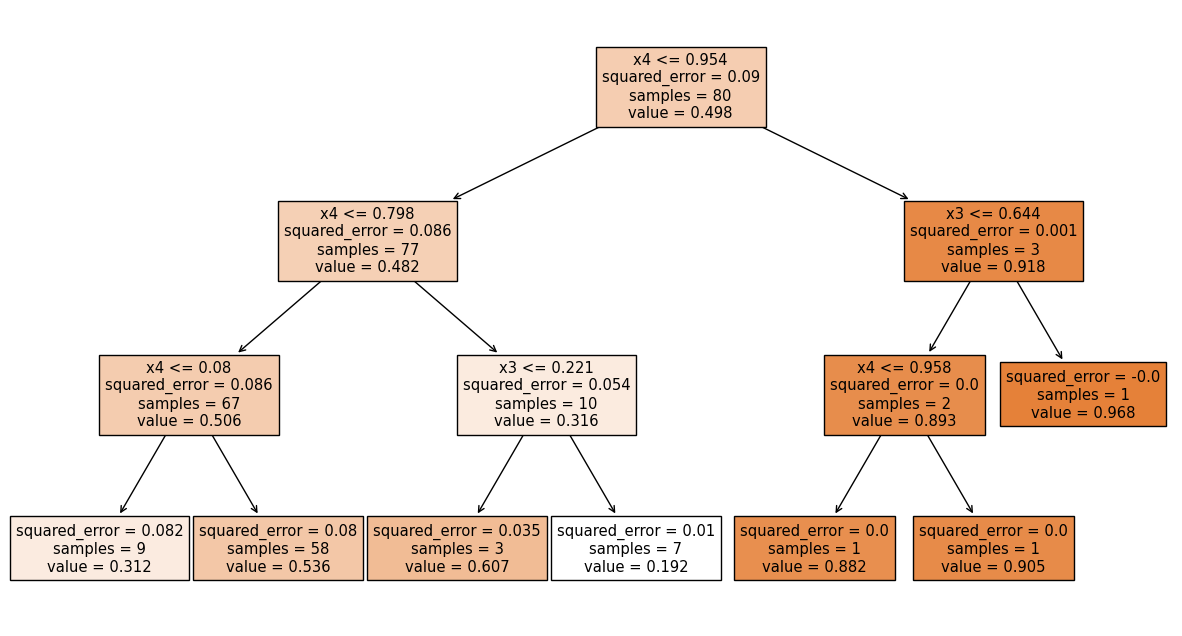

In [94]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn import tree

## fitting a decision tree classifier
dt_model = model_y1.fit(train_data[['x3', 'x4']], train_data['y1'])



## feature importances
print(dt_model.feature_importances_)


## Text Representation
dt_clf_model_text = tree.export_text(dt_model)

print(dt_clf_model_text)

## Plot Tree with plot_tree
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(dt_model, 
                  feature_names=['x3', 'x4'],
                  filled=True)

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# 예제 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'x1': np.random.rand(100),
    'x2': np.random.rand(100),
    'x3': np.random.rand(100),
    'x4': np.random.rand(100),
    'y1': np.random.rand(100),
    'y2': np.random.rand(100),
    'y3': np.random.rand(100)
})

# 데이터셋을 train:test = 8:2로 나누기
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

# 첫 번째 Decision Tree Regressor: x3, x4를 feature로 하여 y1 학습 (depth=3)
model_y1 = DecisionTreeRegressor(max_depth=3, random_state=0)
model_y1.fit(train_data[['x3', 'x4']], train_data['y1'])

# 각 데이터 포인트가 속하는 leaf node의 번호 계산
leaf_nodes_y1_train = model_y1.apply(train_data[['x3', 'x4']])
train_data['leaf_node_y1'] = leaf_nodes_y1_train

# 두 번째 Decision Tree Regressor: 각 leaf node를 그룹으로 해서 x3, x4를 feature로 하여 y2 학습 (leaf node에 최소한의 데이터 개수가 3개가 되게 함)
models_y2 = {}
leaf_counts_y1 = train_data['leaf_node_y1'].value_counts()

for leaf_node_y1 in leaf_counts_y1.index:
    if leaf_counts_y1[leaf_node_y1] >= 3:
        subset_data = train_data[train_data['leaf_node_y1'] == leaf_node_y1]
        model_y2 = DecisionTreeRegressor(max_depth=3)
        model_y2.fit(subset_data[['x3', 'x4']], subset_data['y2'])
        models_y2[leaf_node_y1] = model_y2

# Test set에 대한 예측 및 leaf node 번호 계산
leaf_nodes_y1_test = model_y1.apply(train_data[['x3', 'x4']])
train_data['leaf_node_y1'] = leaf_nodes_y1_test

leaf_nodes_y2_test = []
for i in range(len(train_data)):
    leaf_node_y1 = train_data.iloc[i]['leaf_node_y1']
    if leaf_node_y1 in models_y2:
        leaf_node_y2 = models_y2[leaf_node_y1].apply(train_data.iloc[[i]][['x3', 'x4']])
        leaf_nodes_y2_test.append(leaf_node_y2[0])
    else:
        leaf_nodes_y2_test.append(np.nan)

train_data['leaf_node_y2'] = leaf_nodes_y2_test

# 각 leaf node에 따른 예측값 및 평균 계산
predictions = []
for i in range(len(train_data)):
    leaf_node_y1 = train_data.iloc[i]['leaf_node_y1']
    leaf_node_y2 = train_data.iloc[i]['leaf_node_y2']
    if pd.notna(leaf_node_y1) and pd.notna(leaf_node_y2):
        # y1 예측값
        y1_pred = model_y1.predict(train_data.iloc[[i]][['x3', 'x4']])
        # y2 예측값
        y2_pred = models_y2[leaf_node_y1].predict(train_data.iloc[[i]][['x3', 'x4']])
        # y3 예측값 (임의의 예측)
        y3_pred = np.random.rand(1)[0]
        # 각 leaf node 별 y1, y2, y3의 평균 계산
        mean_y1 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) & (train_data['leaf_node_y2'] == leaf_node_y2)]['y1'].mean()
        mean_y2 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) & (train_data['leaf_node_y2'] == leaf_node_y2)]['y2'].mean()
        mean_y3 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) & (train_data['leaf_node_y2'] == leaf_node_y2)]['y3'].mean()
        # 결과 저장
        predictions.append([leaf_node_y1, leaf_node_y2, y1_pred[0], y2_pred[0], y3_pred, mean_y1, mean_y2, mean_y3])

# 결과를 DataFrame으로 변환
results = pd.DataFrame(predictions, columns=['Leaf_Node_y1', 'Leaf_Node_y2', 'Predicted_y1', 'Predicted_y2', 'Predicted_y3', 'Mean_y1', 'Mean_y2', 'Mean_y3'])

# 결과를 CSV 파일로 저장
results.to_csv('results_with_leaf_nodes_means.csv', index=False)

results.head(10)

,Leaf_Node_y1,Leaf_Node_y2,Predicted_y1,Predicted_y2,Predicted_y3,Mean_y1,Mean_y2,Mean_y3
0,3.0,2.0,0.312118,0.588740,0.080532,0.046007,0.588740,0.399802
1,4.0,3.0,0.536372,0.585386,0.085311,0.555080,0.585386,0.463748
2,4.0,3.0,0.536372,0.585386,0.221396,0.555080,0.585386,0.463748
3,4.0,3.0,0.536372,0.585386,0.100014,0.555080,0.585386,0.463748
4,3.0,7.0,0.312118,0.016872,0.265040,0.348519,0.016872,0.147809
5,4.0,3.0,0.536372,0.585386,0.066149,0.555080,0.585386,0.463748
6,4.0,3.0,0.536372,0.585386,0.065605,0.555080,0.585386,0.463748
7,4.0,3.0,0.536372,0.585386,0.856276,0.555080,0.585386,0.463748
8,7.0,8.0,0.191670,0.471492,0.162120,0.195081,0.471492,0.216872
9,4.0,14.0,0.536372,0.160468,0.559682,0.699575,0.160468,0.726342


In [92]:
count_a_b = results.groupby(['Leaf_Node_y1', 'Leaf_Node_y2']).size().reset_index(name='count')
print("Variable 'a' and 'b' value counts:")
print(count_a_b)

Variable 'a' and 'b' value counts:
    Leaf_Node_y1  Leaf_Node_y2  count
0            3.0           2.0      1
1            3.0           3.0      1
2            3.0           6.0      5
3            3.0           7.0      1
4            3.0           8.0      1
5            4.0           3.0     43
6            4.0           4.0      1
7            4.0           6.0      4
8            4.0           7.0      3
9            4.0          10.0      4
10           4.0          11.0      1
11           4.0          13.0      1
12           4.0          14.0      1
13           6.0           1.0      1
14           6.0           3.0      1
15           6.0           4.0      1
16           7.0           2.0      1
17           7.0           3.0      1
18           7.0           5.0      1
19           7.0           7.0      2
20           7.0           8.0      2


In [ ]:



# 각 leaf node에 따른 예측값 및 평균 계산
predictions = []
for i in range(len(test_data)):
    leaf_node_y1 = test_data.iloc[i]['leaf_node_y1']
    leaf_node_y2 = test_data.iloc[i]['leaf_node_y2']
    if pd.notna(leaf_node_y1) and pd.notna(leaf_node_y2):
        # y1 예측값
        y1_pred = model_y1.predict(test_data.iloc[[i]][['x3', 'x4']])
        # y2 예측값
        y2_pred = models_y2[leaf_node_y1].predict(test_data.iloc[[i]][['x3', 'x4']])
        # y3 예측값 (임의의 예측)
        y3_pred = np.random.rand(1)[0]
        # 각 leaf node 별 y1, y2, y3의 평균 계산
        mean_y1 = train_data[train_data['leaf_node_y1'] == leaf_node_y1]['y1'].mean() if 'leaf_node_y1' in train_data.columns else np.nan
        mean_y2 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) & (train_data['leaf_node_y2'] == leaf_node_y2)]['y2'].mean() if 'leaf_node_y2' in train_data.columns else np.nan
        mean_y3 = train_data[(train_data['leaf_node_y1'] == leaf_node_y1) & (train_data['leaf_node_y2'] == leaf_node_y2)]['y3'].mean() if 'leaf_node_y2' in train_data.columns else np.nan
        # 결과 저장
        predictions.append([leaf_node_y1, leaf_node_y2, y1_pred[0], y2_pred[0], y3_pred, mean_y1, mean_y2, mean_y3])

# 결과를 DataFrame으로 변환
results = pd.DataFrame(predictions, columns=['Leaf_Node_y1', 'Leaf_Node_y2', 'Predicted_y1', 'Predicted_y2', 'Predicted_y3', 'Mean_y1', 'Mean_y2', 'Mean_y3'])

# 결과를 CSV 파일로 저장
results.to_csv('results_with_leaf_nodes_means.csv', index=False)

results

In [62]:
#----------------- 아래는 test set에 대해서 한 것
# 예측값 계산
Y_pred=tree_y1.predict(X_test) 

# 각 데이터 포인트가 속하는 leaf node 번호 계산
leaf_nodes = tree_y1.apply(X_test)
# Y_pred

# 결과를 DataFrame에 추가
# df = pd.DataFrame(X_test, columns=['X2', 'X3'])
df=X_test.copy()
df['Actual_Y'] = y_test_1
df['Predicted_Y'] = Y_pred
df['Leaf_Node'] = leaf_nodes

df

,x3,x4,Actual_Y,Predicted_Y,Leaf_Node
83,0.308061,0.093873,0.781296,0.500658,9
53,0.965419,0.250251,0.731648,0.500658,9
70,0.973664,0.041068,0.958541,0.500658,9
45,0.541448,0.578865,0.936648,0.500658,9
44,0.209072,0.027617,0.348337,0.665303,6
39,0.397572,0.194274,0.681614,0.500658,9
22,0.803140,0.208919,0.677168,0.500658,9
80,0.366469,0.915214,0.553703,0.500658,9
10,0.411037,0.572292,0.260894,0.500658,9
0,0.403836,0.768554,0.175330,0.500658,9


In [55]:
result = X_test.copy()
result

,x3,x4
83,0.308061,0.093873
53,0.965419,0.250251
70,0.973664,0.041068
45,0.541448,0.578865
44,0.209072,0.027617
39,0.397572,0.194274
22,0.803140,0.208919
80,0.366469,0.915214
10,0.411037,0.572292
0,0.403836,0.768554


In [51]:
# 결과를 DataFrame에 추가
result = X_test.copy()

df=pd.DataFrame(leaf_nodes_train)
concated_df=pd.concat([X_test,pd.DataFrame(leaf_nodes_train) ], axis=1)
concated_df

# concat_df = pd.concat([pd.DataFrame(X),pd.DataFrame(Y), pd.DataFrame(Y_pred)], axis=1)

,x3,x4,0
83,0.308061,0.093873,NaN
53,0.965419,0.250251,NaN
70,0.973664,0.041068,NaN
45,0.541448,0.578865,NaN
44,0.209072,0.027617,NaN
39,0.397572,0.194274,NaN
22,0.803140,0.208919,NaN
80,0.366469,0.915214,NaN
10,0.411037,0.572292,9.0
0,0.403836,0.768554,9.0


In [53]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# 예제 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 3)  # 100개의 샘플과 3개의 독립 변수
Y = np.random.rand(100, 1)  # 100개의 샘플과 1개의 종속 변수

# Decision Tree Regressor 모델 학습
model = DecisionTreeRegressor()
model.fit(X, Y)

# 예측값 계산
Y_pred = model.predict(X)

# 각 데이터 포인트가 속하는 leaf node 번호 계산
leaf_nodes = model.apply(X)

# 결과를 DataFrame에 추가
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
df['Actual_Y'] = Y
df['Predicted_Y'] = Y_pred
df['Leaf_Node'] = leaf_nodes

# 출력
print("DataFrame with Leaf Node Numbers:")
print(df)

DataFrame with Leaf Node Numbers:
    Feature1  Feature2  Feature3  Actual_Y  Predicted_Y  Leaf_Node
0   0.548814  0.715189  0.602763  0.906555     0.906555        146
1   0.544883  0.423655  0.645894  0.774047     0.774047         95
2   0.437587  0.891773  0.963663  0.333145     0.333145        150
3   0.383442  0.791725  0.528895  0.081101     0.081101        136
4   0.568045  0.925597  0.071036  0.407241     0.407241        151
..       ...       ...       ...       ...          ...        ...
95  0.148141  0.981829  0.478370  0.958983     0.958983         48
96  0.497391  0.639473  0.368585  0.355369     0.355369        141
97  0.136900  0.822118  0.189848  0.356707     0.356707         37
98  0.511319  0.224317  0.097844  0.016329     0.016329         74
99  0.862192  0.972919  0.960835  0.185232     0.185232        197

[100 rows x 6 columns]


In [42]:
leaf_nodes_train

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  3,  6,  9,  6,  9,  9,  9,
        9,  9,  9,  9,  9, 10,  9,  9,  6,  9,  9,  9,  9,  9,  7,  9,  9,
        7,  9,  6,  9,  9,  9,  6,  9,  9,  9,  9,  9,  9,  9,  9,  6,  6,
        9,  9,  6,  9,  7,  9,  9,  9,  9,  9,  9,  6,  9,  2,  9,  7,  7,
        9,  7,  9,  9,  9,  9,  9,  9,  7,  9,  9,  7], dtype=int64)

In [ ]:

    
    
    # Second decision tree for y2 using x2, x3, x4 as features
    X_train_y2 = train_df.drop(columns=['x1', 'y1', 'y3'])
    X_test_y2 = test_df.drop(columns=['x1', 'y1', 'y3'])

In [ ]:

    tree_y2 = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree_y2.fit(X_train_y2, y_train_2)
        
    # Evaluate on test set
    y2_pred = tree_y2.predict(X_test_y2)
    
    mse_y1 = mean_squared_error(y_test_1, tree_y1.predict(X_test))
    mse_y2 = mean_squared_error(y_test_2, y2_pred)
    mse_y3 = mean_squared_error(y_test_3, y_test_3.mean() * np.ones_like(y_test_3))  # predicting the mean as baseline
    
    rmse_y1 = np.sqrt(mse_y1)
    rmse_y2 = np.sqrt(mse_y2)
    rmse_y3 = np.sqrt(mse_y3)
    
    rmse_results.append({
        'group': group,
        'rmse_y1': rmse_y1,
        'rmse_y2': rmse_y2,
        'rmse_y3': rmse_y3
    })
    
    # Get leaf nodes and calculate mean values
    leaf_nodes_test_y1 = tree_y1.apply(X_test)
    leaf_nodes_test_y2 = tree_y2.apply(X_test_y2)
    
    for i, row in test_df.iterrows():
        leaf_node_y1 = leaf_nodes_test_y1[test_df.index.get_loc(i)]
        leaf_node_y2 = leaf_nodes_test_y2[test_df.index.get_loc(i)]
        
        leaf_node_indices = leaf_nodes_test_y2 == leaf_node_y2
        leaf_node_avg_y1 = test_df.loc[leaf_node_indices, 'y1'].mean()
        leaf_node_avg_y2 = test_df.loc[leaf_node_indices, 'y2'].mean()
        leaf_node_avg_y3 = test_df.loc[leaf_node_indices, 'y3'].mean()
        
        results.append({
            'index': i,
            'group': group,
            'leaf_node_y1': leaf_node_y1,
            'leaf_node_y2': leaf_node_y2,
            'leaf_node_avg_y1': leaf_node_avg_y1,
            'leaf_node_avg_y2': leaf_node_avg_y2,
            'leaf_node_avg_y3': leaf_node_avg_y3
        })



# Calculate overall RMSE
overall_X_train = train_df.drop(columns=['x1', 'y1', 'y2', 'y3'])
overall_X_test = test_df.drop(columns=['x1', 'y1', 'y2', 'y3'])

overall_tree_y1 = DecisionTreeRegressor(max_depth=3, random_state=42)
overall_tree_y1.fit(overall_X_train, train_df['y1'])
overall_y1_pred = overall_tree_y1.predict(overall_X_test)
overall_mse_y1 = mean_squared_error(test_df['y1'], overall_y1_pred)

overall_tree_y2 = DecisionTreeRegressor(max_depth=3, random_state=42)
overall_tree_y2.fit(train_df.drop(columns=['x1', 'y1', 'y3']), train_df['y2'])
overall_y2_pred = overall_tree_y2.predict(test_df.drop(columns=['x1', 'y1', 'y3']))
overall_mse_y2 = mean_squared_error(test_df['y2'], overall_y2_pred)

overall_mse_y3 = mean_squared_error(test_df['y3'], test_df['y3'].mean() * np.ones_like(test_df['y3']))  # predicting the mean as baseline

overall_rmse_y1 = np.sqrt(overall_mse_y1)
overall_rmse_y2 = np.sqrt(overall_mse_y2)
overall_rmse_y3 = np.sqrt(overall_mse_y3)

rmse_results.append({
    'group': 'overall',
    'rmse_y1': overall_rmse_y1,
    'rmse_y2': overall_rmse_y2,
    'rmse_y3': overall_rmse_y3
})

# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('leaf_node_results.csv', index=False)

rmse_results_df = pd.DataFrame(rmse_results)
rmse_results_df.to_csv('rmse_results.csv', index=False)

In [ ]:



# Initialize a list to store the results for CSV
results = []
rmse_results = []

# Function to train, visualize and evaluate decision trees per group in x1
def train_and_evaluate_group(group, train_df, test_df):
    group_train_df = train_df[train_df['x1'] == group]
    group_test_df = test_df[test_df['x1'] == group]
    
    X_train = group_train_df.drop(columns=['x1', 'y1', 'y2', 'y3'])
    y_train_1 = group_train_df['y1']
    y_train_2 = group_train_df['y2']
    y_train_3 = group_train_df['y3']
    
    X_test = group_test_df.drop(columns=['x1', 'y1', 'y2', 'y3'])
    y_test_1 = group_test_df['y1']
    y_test_2 = group_test_df['y2']
    y_test_3 = group_test_df['y3']
    
    # First decision tree for y1
    tree_y1 = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree_y1.fit(X_train, y_train_1)
    
    # Visualize and save the first tree
    dot_data_y1 = export_graphviz(tree_y1, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns)
    graph_y1 = graphviz.Source(dot_data_y1)
    graph_y1.render(f"group_{group}_tree_y1")
    
    # Predict y1 to get leaf nodes
    leaf_nodes_train = tree_y1.apply(X_train)
    
    # Second decision tree for y2 using x2, x3, x4 as features
    X_train_y2 = group_train_df.drop(columns=['x1', 'y1', 'y3'])
    X_test_y2 = group_test_df.drop(columns=['x1', 'y1', 'y3'])
    
    tree_y2 = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree_y2.fit(X_train_y2, y_train_2)
    
    # Visualize and save the second tree
    dot_data_y2 = export_graphviz(tree_y2, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=X_train_y2.columns)
    graph_y2 = graphviz.Source(dot_data_y2)
    graph_y2.render(f"group_{group}_tree_y2")
    
    # Evaluate on test set
    y2_pred = tree_y2.predict(X_test_y2)
    
    mse_y1 = mean_squared_error(y_test_1, tree_y1.predict(X_test))
    mse_y2 = mean_squared_error(y_test_2, y2_pred)
    mse_y3 = mean_squared_error(y_test_3, y_test_3.mean() * np.ones_like(y_test_3))  # predicting the mean as baseline
    
    rmse_y1 = np.sqrt(mse_y1)
    rmse_y2 = np.sqrt(mse_y2)
    rmse_y3 = np.sqrt(mse_y3)
    
    rmse_results.append({
        'group': group,
        'rmse_y1': rmse_y1,
        'rmse_y2': rmse_y2,
        'rmse_y3': rmse_y3
    })
    
    # Get leaf nodes and calculate mean values
    leaf_nodes_test_y1 = tree_y1.apply(X_test)
    leaf_nodes_test_y2 = tree_y2.apply(X_test_y2)
    
    for i, row in group_test_df.iterrows():
        leaf_node_y1 = leaf_nodes_test_y1[group_test_df.index.get_loc(i)]
        leaf_node_y2 = leaf_nodes_test_y2[group_test_df.index.get_loc(i)]
        
        leaf_node_indices = leaf_nodes_test_y2 == leaf_node_y2
        leaf_node_avg_y1 = group_test_df.loc[leaf_node_indices, 'y1'].mean()
        leaf_node_avg_y2 = group_test_df.loc[leaf_node_indices, 'y2'].mean()
        leaf_node_avg_y3 = group_test_df.loc[leaf_node_indices, 'y3'].mean()
        
        results.append({
            'index': i,
            'group': group,
            'leaf_node_y1': leaf_node_y1,
            'leaf_node_y2': leaf_node_y2,
            'leaf_node_avg_y1': leaf_node_avg_y1,
            'leaf_node_avg_y2': leaf_node_avg_y2,
            'leaf_node_avg_y3': leaf_node_avg_y3
        })

# Apply the function to each group in x1
for group in df['x1'].unique():
    train_and_evaluate_group(group, train_df, test_df)

# Calculate overall RMSE
overall_X_train = train_df.drop(columns=['x1', 'y1', 'y2', 'y3'])
overall_X_test = test_df.drop(columns=['x1', 'y1', 'y2', 'y3'])

overall_tree_y1 = DecisionTreeRegressor(max_depth=3, random_state=42)
overall_tree_y1.fit(overall_X_train, train_df['y1'])
overall_y1_pred = overall_tree_y1.predict(overall_X_test)
overall_mse_y1 = mean_squared_error(test_df['y1'], overall_y1_pred)

overall_tree_y2 = DecisionTreeRegressor(max_depth=3, random_state=42)
overall_tree_y2.fit(train_df.drop(columns=['x1', 'y1', 'y3']), train_df['y2'])
overall_y2_pred = overall_tree_y2.predict(test_df.drop(columns=['x1', 'y1', 'y3']))
overall_mse_y2 = mean_squared_error(test_df['y2'], overall_y2_pred)

overall_mse_y3 = mean_squared_error(test_df['y3'], test_df['y3'].mean() * np.ones_like(test_df['y3']))  # predicting the mean as baseline

overall_rmse_y1 = np.sqrt(overall_mse_y1)
overall_rmse_y2 = np.sqrt(overall_mse_y2)
overall_rmse_y3 = np.sqrt(overall_mse_y3)

rmse_results.append({
    'group': 'overall',
    'rmse_y1': overall_rmse_y1,
    'rmse_y2': overall_rmse_y2,
    'rmse_y3': overall_rmse_y3
})

# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('leaf_node_results.csv', index=False)

rmse_results_df = pd.DataFrame(rmse_results)
rmse_results_df.to_csv('rmse_results.csv', index=False)